#Importing libraries & Preprocessing

In [84]:
!pip install xgboost
!pip install lightgbm
!pip install catboost

In [86]:
# Import necessary libs

import pandas as pd
import numpy as np
from sklearn import metrics
import warnings
from sklearn import preprocessing
warnings.filterwarnings('ignore')

## Modelos de Machine Learning
import statsmodels.api as sm
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from catboost import CatBoostClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.feature_selection import SelectFromModel
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
from statsmodels.stats.weightstats import ttest_ind
from statsmodels.stats.outliers_influence import variance_inflation_factor

## Métricas de los modelos
from sklearn.metrics import confusion_matrix
from sklearn.metrics import auc
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import classification_report


## Selección de Variables
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler

# visualization
import seaborn as sns
import matplotlib.pyplot as plt

# Common seed value to be used whenever required
seed = 16
np.random.seed(seed)

In [87]:
pd.options.display.max_columns = 300
pd.options.display.max_rows = 300

In [88]:
#Loading data
dataset = pd.read_csv('brast-cancer-dataset.csv',sep=',')

In [89]:
dataset.shape

(569, 33)

In [90]:
#Target
dataset.diagnosis.unique()

array(['M', 'B'], dtype=object)

In [91]:
#Checking nulls
dataset.isna().sum()

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

**No existen nulos en el dataset** Si existen!!!!!

In [92]:
#Deleting unnamed column
dataset.drop("Unnamed: 32", axis="columns", inplace=True)

In [93]:
#Creating a backup 
dataset_backup = dataset.copy(deep=True)
dataset_backup.drop(["id"], axis="columns", inplace=True)

In [94]:
dataset_backup

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,1.1760,1.2560,7.673,158.70,0.010300,0.02891,0.05198,0.02454,0.01114,0.004239,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,0.7655,2.4630,5.203,99.04,0.005769,0.02423,0.03950,0.01678,0.01898,0.002498,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,0.4564,1.0750,3.425,48.55,0.005903,0.03731,0.04730,0.01557,0.01318,0.003892,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,0.7260,1.5950,5.772,86.22,0.006522,0.06158,0.07117,0.01664,0.02324,0.006185,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [95]:
#Setting the target
y = dataset.diagnosis
dataset.drop(["diagnosis", "id"], axis="columns", inplace=True)

In [96]:
dataset.head(4)

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300


# Exploratory Data Analysis (EDA)

## Balanceo de datos

Benign percentage =  62.741652021089635
Malignant percentage =  37.258347978910365


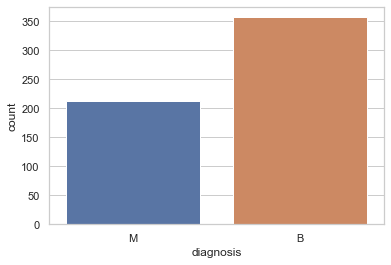

In [ ]:
aux=sns.countplot(y)
Benign, Malignant = y.value_counts(normalize=True)
print("Benign percentage = " , Benign*100)
print("Malignant percentage = " , Malignant*100)

Según esta gráfica, podemos concluir que nuestros datos se encuentran balanceados.

## Principales descriptivos

In [ ]:
dataset.describe()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,0.405172,1.216853,2.866059,40.337079,0.007041,0.025478,0.031894,0.011796,0.020542,0.003795,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,0.277313,0.551648,2.021855,45.491006,0.003003,0.017908,0.030186,0.006170,0.008266,0.002646,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,0.111500,0.360200,0.757000,6.802000,0.001713,0.002252,0.000000,0.000000,0.007882,0.000895,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,0.232400,0.833900,1.606000,17.850000,0.005169,0.013080,0.015090,0.007638,0.015160,0.002248,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,0.324200,1.108000,2.287000,24.530000,0.006380,0.020450,0.025890,0.010930,0.018730,0.003187,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,0.478900,1.474000,3.357000,45.190000,0.008146,0.032450,0.042050,0.014710,0.023480,0.004558,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,2.873000,4.885000,21.980000,542.200000,0.031130,0.135400,0.396000,0.052790,0.078950,0.029840,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


A simple inspección se observa que la variable concave points_worst es la única que aparentemente no presentan valores atípicos por lo que se puede utilizar la media para la interpretación del valor promedio que representa esta variable.

Se observa que todas las variables a excepción de concave points_worst aparentemente presentan valores atípicos por tener una desviación estándar y valor máximo altos, muy por encima del promedio y del percentil 75, por lo que se debería utilizar la mediana o percentil 50 para la interpretación del valor promedio que representa cada variable.

Para verificar la presencia de outliers es necesario realizar un análisis a través de los diagramas boxplot o de cajas, considerando como valores atípicos a las observaciones que superan el valor de Q3+1.5xRIC o Q1-1.5xRIC 

## Boxplot

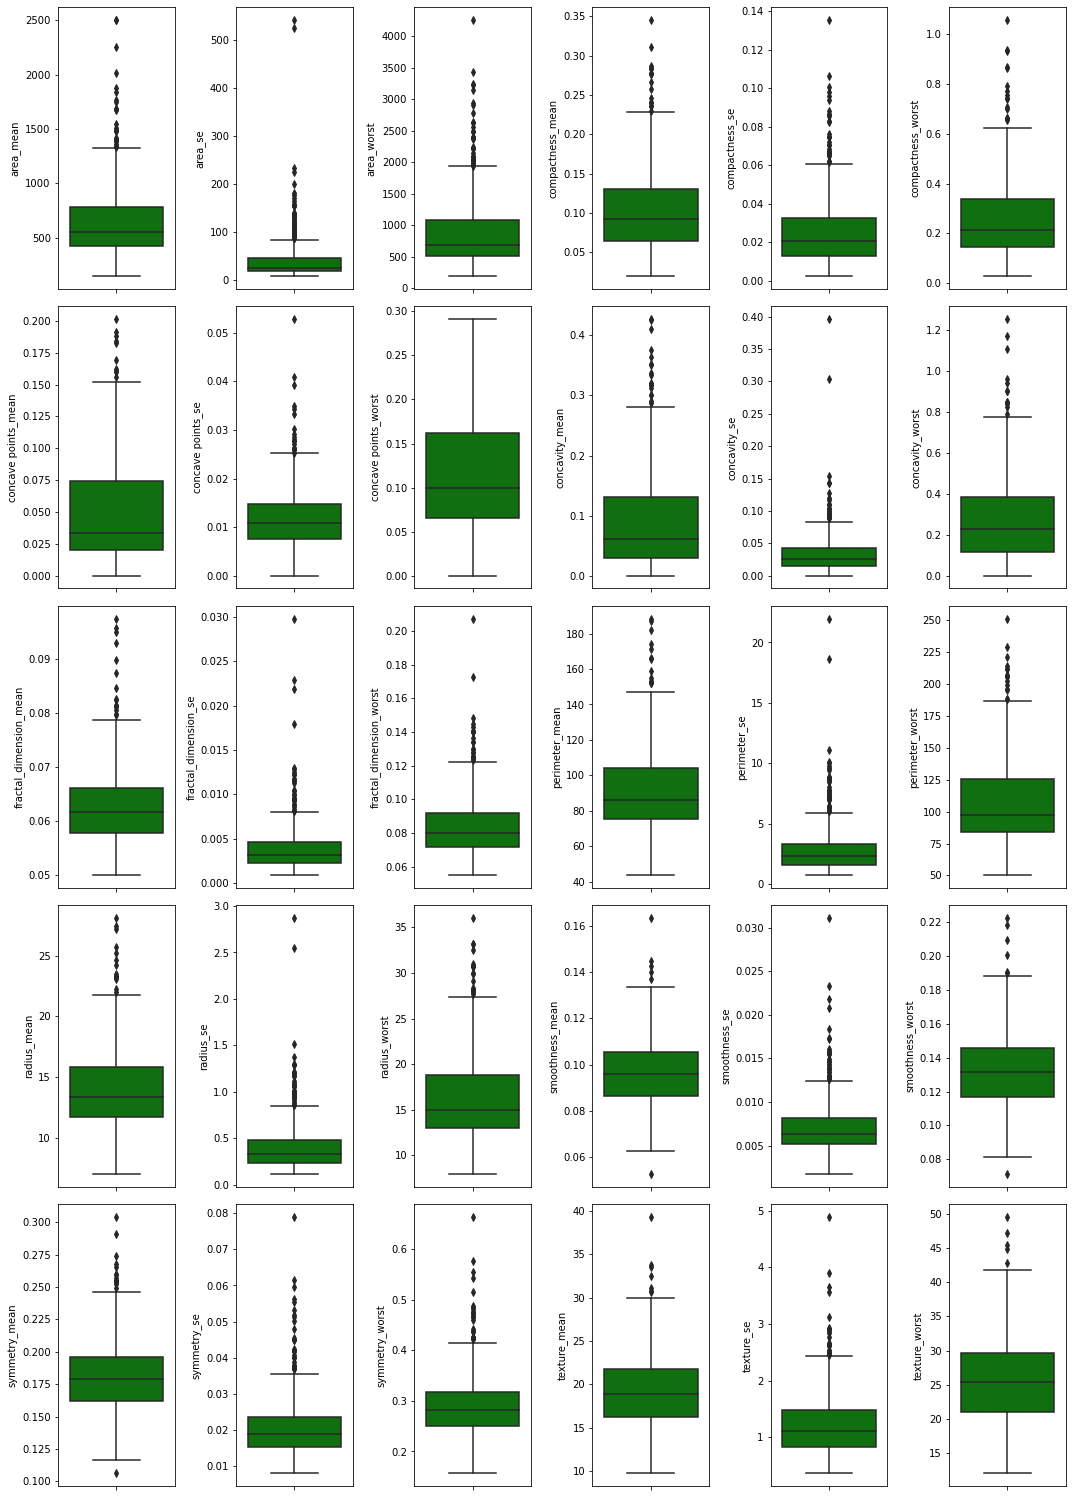

In [ ]:
columns_ordenadas = sorted(list(dataset))
plt.figure(figsize=(15,25))
for i in range(0 ,len(columns_ordenadas)):
  plt.subplot(6, int(len(columns_ordenadas)/5), i+1)
  sns.boxplot(y=dataset[columns_ordenadas[i]], color='green', orient='v')
  plt.tight_layout()

Se puede observar que cada variable presenta valores atípicos (algunos más marcados que otras) a excepción de concave points_worst; por lo que es necesario realizar un análisis más detallado de cada una de ellas con la finalidad de determinar si dichos valores pueden ser removidos o no.

## Histograma

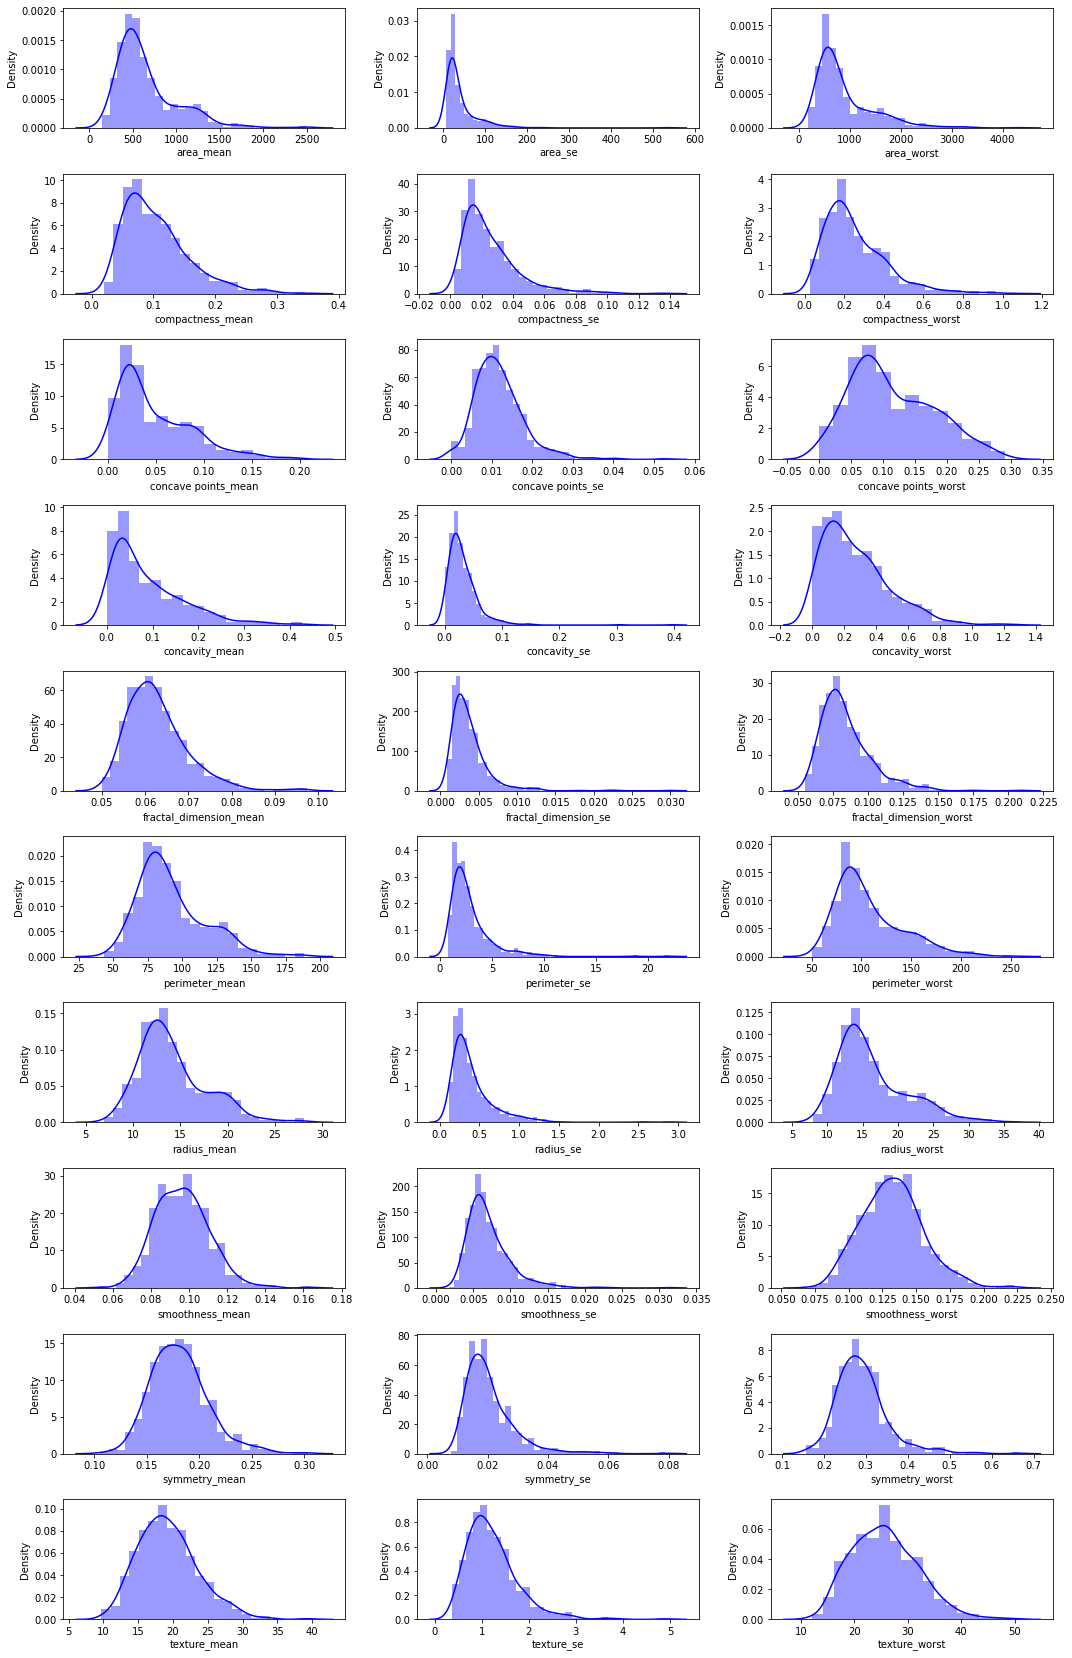

In [ ]:
plt.figure(figsize=(15, 25))
for i in range(0, len(columns_ordenadas)):
  plt.subplot(11, int(len(columns_ordenadas)/9), i+1)
  sns.distplot(dataset[columns_ordenadas[i]], color='blue')
  plt.tight_layout()

Al observar las gráficos de cada variable, se puede notar que las distribuiciones de los datos 
no son muy dispersas, ya que se evidencia un claro agrupamiento de los mismos; sin embargo, también 
se hacen presente algunos valores outliers en cada una de las variables.

## Gráficos de dispersión

### 1. radius (mean, se y worst) vs diagnosis

<Figure size 1080x720 with 0 Axes>

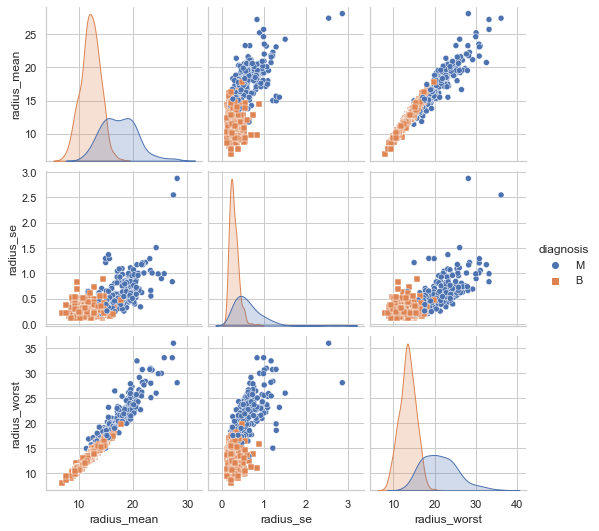

In [ ]:
plt.figure(figsize=(15,10))
sns.set_theme(style="whitegrid")
radius = dataset_backup[["radius_mean", "radius_se", "radius_worst", "diagnosis"]]
sns.pairplot(radius, hue="diagnosis", markers=["o", "s"]);

### 2. texture (mean, se y worst) vs diagnosis

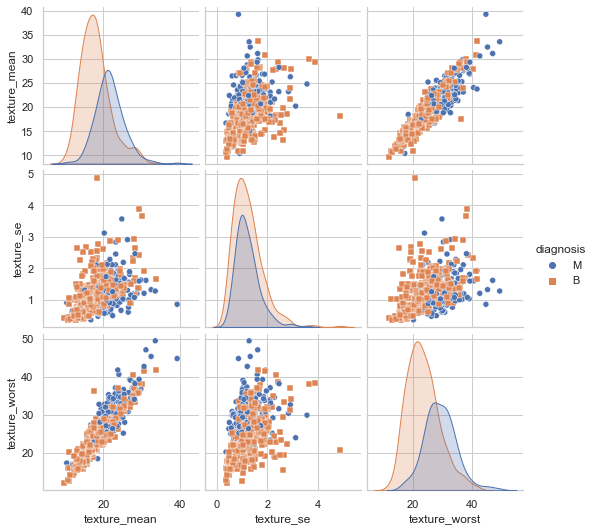

In [ ]:
texture=dataset_backup[["texture_mean", "texture_se", "texture_worst", "diagnosis"]]
sns.pairplot(texture, hue="diagnosis", markers=["o", "s"]);

### 3. perimeter (mean, se y worst) vs diagnosis

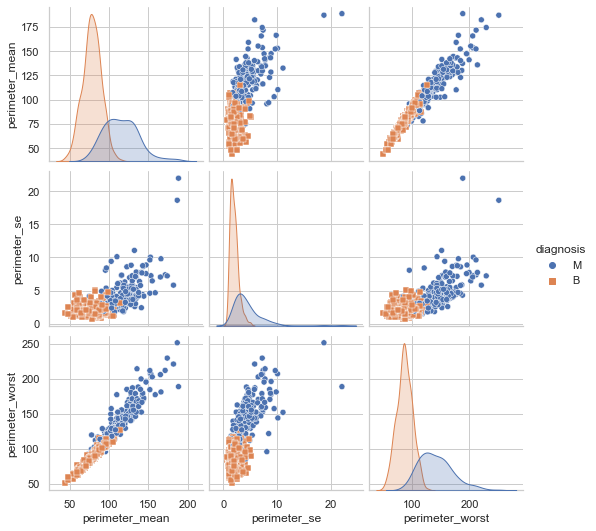

In [ ]:
perimeter=dataset_backup[["perimeter_mean", "perimeter_se", "perimeter_worst", "diagnosis"]]
sns.pairplot(perimeter, hue="diagnosis", markers=["o", "s"]);

### 4. area (mean, se y worst) vs diagnosis

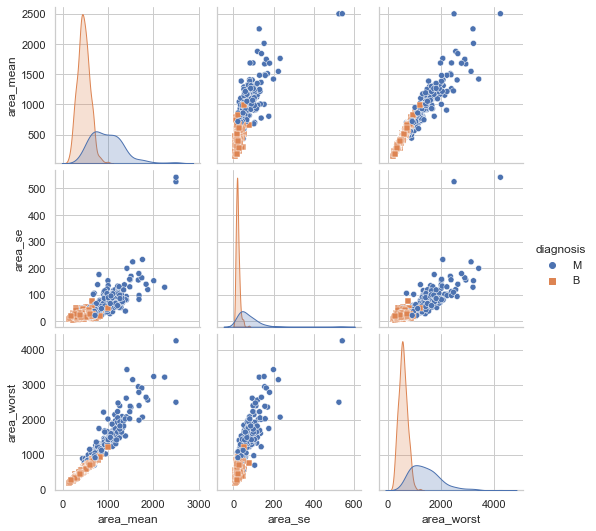

In [ ]:
area=dataset_backup[["area_mean", "area_se", "area_worst", "diagnosis"]]
sns.pairplot(area, hue="diagnosis", markers=["o", "s"]);

### 5. smoothness (mean, se y worst) vs diagnosis

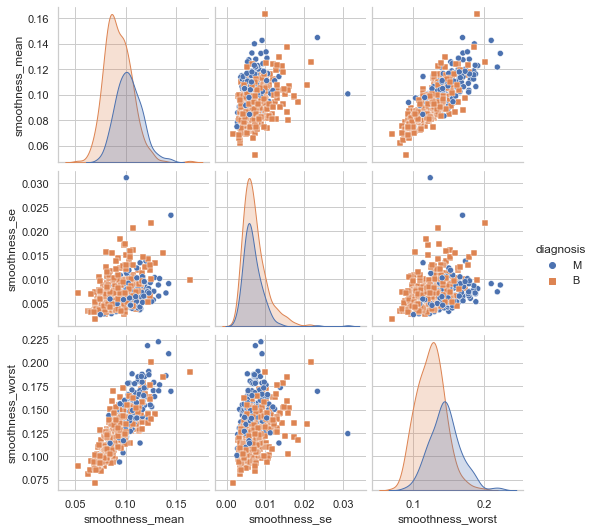

In [ ]:
smoothness=dataset_backup[["smoothness_mean", "smoothness_se", "smoothness_worst", "diagnosis"]]
sns.pairplot(smoothness, hue="diagnosis", markers=["o", "s"]);

### 6. compactness (mean, se y worst) vs diagnosis

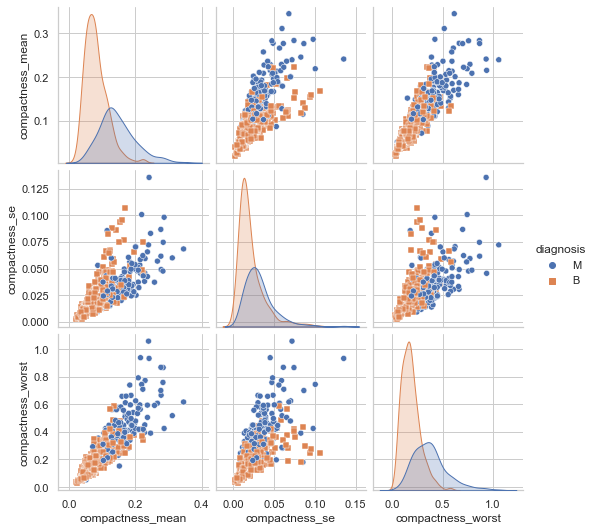

In [ ]:
compactness=dataset_backup[["compactness_mean", "compactness_se", "compactness_worst", "diagnosis"]]
sns.pairplot(compactness, hue="diagnosis", markers=["o", "s"]);

### 7. concavity (mean, se y worst) vs diagnosis

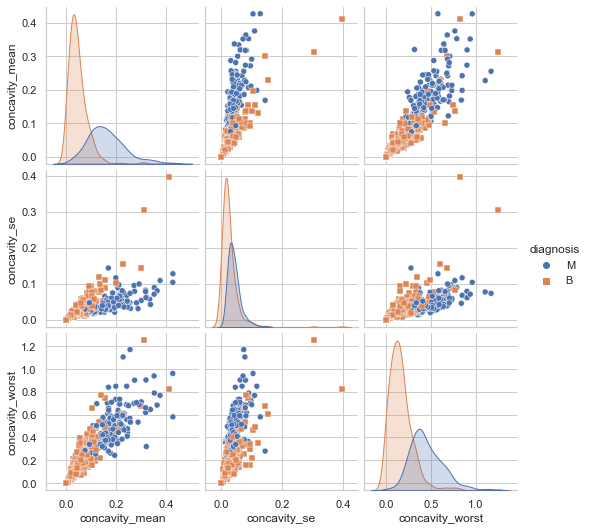

In [ ]:
concavity=dataset_backup[["concavity_mean", "concavity_se", "concavity_worst", "diagnosis"]]
sns.pairplot(concavity, hue="diagnosis", markers=["o", "s"]);

### 8. concave points (mean, se y worst) vs diagnosis

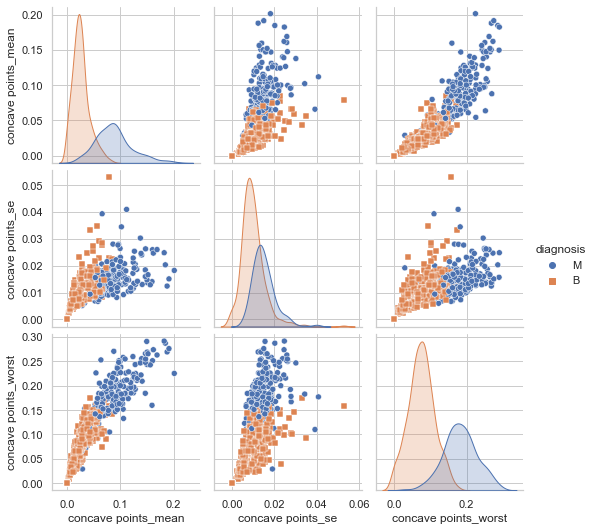

In [ ]:
concave_points=dataset_backup[["concave points_mean", "concave points_se", "concave points_worst", "diagnosis"]]
sns.pairplot(concave_points, hue="diagnosis", markers=["o", "s"]);

### 9. symmetry (mean, se y worst) vs diagnosis

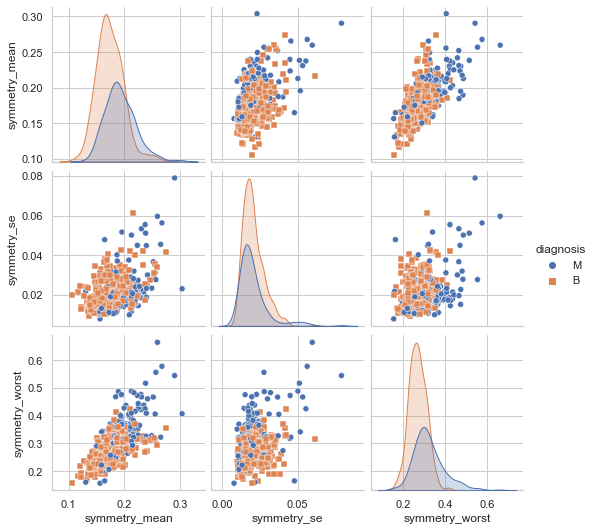

In [ ]:
symmetry=dataset_backup[["symmetry_mean", "symmetry_se", "symmetry_worst", "diagnosis"]]
sns.pairplot(symmetry, hue="diagnosis", markers=["o", "s"]);

### 10. fractal dimesion (mean, se y worst) vs diagnosis

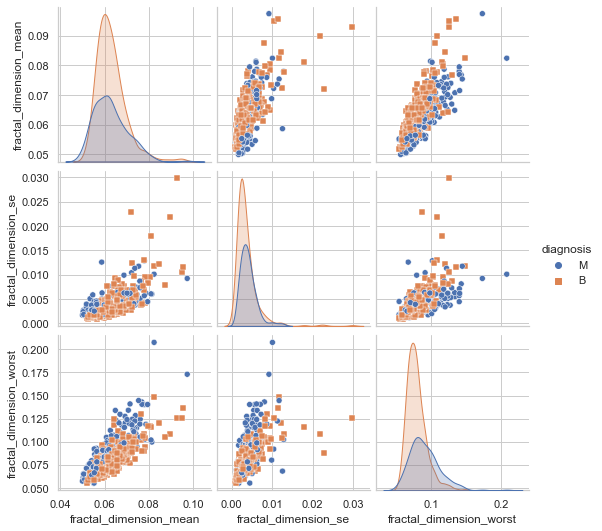

In [ ]:
fractal_dimension=dataset_backup[["fractal_dimension_mean", "fractal_dimension_se", "fractal_dimension_worst", "diagnosis"]]
sns.pairplot(fractal_dimension, hue="diagnosis", markers=["o", "s"]);

A primera vista, analizando los gráficos de dispersión, se puede observar que las variables que permiten una mayor discriminación de las clases de cáncer son perimeter, area, concavity, radius, compactness y concave points (mean, se y worst), por lo que consideramos que dichas variables son importantes y deberían incluirse en el modelo. Asimismo, aclarar que dejamos de lado texture, fractal_dimension, symmetry y smoothness (mean, se y worst), pues estas no son relevantes para realizar dicha discrimación, debido a que las observaciones están superpuestas. 

## OUTLIERS

Cabe mencionar que todas las variables (excepto concave_points_worst) presentan valores outliers; sin embargo, para el análisis de outliers solo se tomó en cuenta a las varibles representativas para el modelo.

### 1. radius_mean

In [ ]:
ra_mn_quartil_3 = dataset['radius_mean'].quantile(0.75)
ra_mn_IQR = dataset['radius_mean'].quantile(0.75)-dataset['radius_mean'].quantile(0.25)
ra_mn_bigote_superior = ra_mn_quartil_3 + 1.5*ra_mn_IQR

print(f'Outliers iniciales: {dataset[dataset["radius_mean"]>ra_mn_bigote_superior].shape[0]}')
print(f'Outliers después de analizar el boxplot: {dataset[dataset["radius_mean"]>27].shape[0]}')

Outliers iniciales: 14 
Outliers después de analizar el boxplot: 3


### 2. radius_se

In [ ]:
ra_se_quartil_3 = dataset['radius_se'].quantile(0.75)
ra_se_IQR = dataset['radius_se'].quantile(0.75)-dataset['radius_se'].quantile(0.25)
ra_se_bigote_superior = ra_se_quartil_3 + 1.5*ra_se_IQR

print(f'Outliers iniciales: {dataset[dataset["radius_se"]>ra_se_bigote_superior].shape[0]}')
print(f'Outliers después de analizar el boxplot: {dataset[dataset["radius_se"]>2].shape[0]}')

Outliers iniciales: 38
Outliers después de analizar el boxplot: 2


### 3. radius_worst

In [ ]:
ra_wrs_quartil_3 = dataset['radius_worst'].quantile(0.75)
ra_wrs_IQR = dataset['radius_worst'].quantile(0.75)-dataset['radius_worst'].quantile(0.25)
ra_wrs_bigote_superior = ra_wrs_quartil_3 + 1.5*ra_wrs_IQR

print(f'Outliers iniciales: {dataset[dataset["radius_worst"]>ra_wrs_bigote_superior].shape[0]}')
print(f'Outliers después de analizar el boxplot: {dataset[dataset["radius_worst"]>33].shape[0]}')

Outliers iniciales: 17
Outliers después de analizar el boxplot: 3


En el caso de la variable radius, se dejaron de lado los outliers más marcados (los cuales son pocos), puesto que los otros outliers tienen una distribución más cercana al conjunto de datos.

### 4. perimeter_mean

In [ ]:
pe_mn_quartil_3 = dataset['perimeter_mean'].quantile(0.75)
pe_mn_IQR = dataset['perimeter_mean'].quantile(0.75)-dataset['perimeter_mean'].quantile(0.25)
pe_mn_bigote_superior = pe_mn_quartil_3 + 1.5*pe_mn_IQR

print(f'Outliers iniciales: {dataset[dataset["perimeter_mean"]>pe_mn_bigote_superior].shape[0]}')
print(f'Outliers después de analizar el boxplot: {dataset[dataset["perimeter_mean"]>180].shape[0]}')

Outliers iniciales: 13
Outliers después de analizar el boxplot: 3


### 5. perimeter_se

In [ ]:
pe_se_quartil_3 = dataset['perimeter_se'].quantile(0.75)
pe_se_IQR = dataset['perimeter_se'].quantile(0.75)-dataset['perimeter_se'].quantile(0.25)
pe_se_bigote_superior = pe_se_quartil_3 + 1.5*pe_se_IQR

print(f'Outliers iniciales: {dataset[dataset["perimeter_se"]>pe_se_bigote_superior].shape[0]}')
print(f'Outliers después de analizar el boxplot: {dataset[dataset["perimeter_se"]>15].shape[0]}')

Outliers iniciales: 38
Outliers después de analizar el boxplot: 2


### 6. perimeter_worst

In [ ]:
pe_wrs_quartil_3 = dataset['perimeter_worst'].quantile(0.75)
pe_wrs_IQR = dataset['perimeter_worst'].quantile(0.75)-dataset['perimeter_worst'].quantile(0.25)
pe_wrs_bigote_superior = pe_wrs_quartil_3 + 1.5*pe_wrs_IQR

print(f'Outliers iniciales: {dataset[dataset["perimeter_worst"]>pe_wrs_bigote_superior].shape[0]}')
print(f'Outliers después de analizar el boxplot: {dataset[dataset["perimeter_worst"]>220.5125].shape[0]}')

Outliers iniciales: 15
Outliers después de analizar el boxplot: 3


Al igual que en el caso anterior, se tomaron en cuenta los outliers más notorios según el diagrama de cajas.

### 7. area_mean

In [ ]:
ar_mn_quartil_3 = dataset['area_mean'].quantile(0.75)
ar_mn_IQR = dataset['area_mean'].quantile(0.75)-dataset['area_mean'].quantile(0.25)
ar_mn_bigote_superior = ar_mn_quartil_3 + 1.5*ar_mn_IQR

print(f'Outliers iniciales: {dataset[dataset["area_mean"]>ar_mn_bigote_superior].shape[0]}')
print(f'Outliers después de analizar el boxplot: {dataset[dataset["area_mean"]>1990].shape[0]}')

Outliers iniciales: 25
Outliers después de analizar el boxplot: 4


### 8. area_se

In [ ]:
ar_se_quartil_3 = dataset['area_se'].quantile(0.75)
ar_se_IQR = dataset['area_se'].quantile(0.75)-dataset['area_se'].quantile(0.25)
ar_se_bigote_superior = ar_se_quartil_3 + 1.5*ar_se_IQR

print(f'Outliers iniciales: {dataset[dataset["area_se"]>ar_se_bigote_superior].shape[0]}')
print(f'Outliers después de analizar el boxplot: {dataset[dataset["area_se"]>300].shape[0]}')

Outliers iniciales: 65
Outliers después de analizar el boxplot: 2


### 9. area_worst

In [ ]:
ar_wrs_quartil_3 = dataset['area_worst'].quantile(0.75)
ar_wrs_IQR = dataset['area_worst'].quantile(0.75)-dataset['area_worst'].quantile(0.25)
ar_wrs_bigote_superior = ar_wrs_quartil_3 + 1.5*ar_wrs_IQR

print(f'Outliers iniciales: {dataset[dataset["area_worst"]>ar_wrs_bigote_superior].shape[0]}')
print(f'Outliers después de analizar el boxplot: {dataset[dataset["area_worst"]>2826.425].shape[0]}')

Outliers iniciales: 35
Outliers después de analizar el boxplot: 7


En el caso de la variable area (mean y se) se recomienda eliminar los outliers porque son valores muy marcados, por otro lado, para el area (worst) se decidió conservar dichos valores.

### 10. compactness_mean

In [ ]:
cpt_mn_quartil_3 = dataset['compactness_mean'].quantile(0.75)
cpt_mn_IQR = dataset['compactness_mean'].quantile(0.75)-dataset['compactness_mean'].quantile(0.25)
cpt_mn_bigote_superior = cpt_mn_quartil_3 + 1.5*cpt_mn_IQR

print(f'Outliers iniciales: {dataset[dataset["compactness_mean"]>cpt_mn_bigote_superior].shape[0]}')
print(f'Outliers después de analizar el boxplot: {dataset[dataset["compactness_mean"]>0.2666].shape[0]}')

Outliers iniciales: 16
Outliers después de analizar el boxplot: 8


### 11. compactness_se

In [ ]:
cpt_se_quartil_3 = dataset['compactness_se'].quantile(0.75)
cpt_se_IQR = dataset['compactness_se'].quantile(0.75)-dataset['compactness_se'].quantile(0.25)
cpt_se_bigote_superior = cpt_se_quartil_3 + 1.5*cpt_se_IQR

print(f'Outliers iniciales: {dataset[dataset["compactness_se"]>cpt_se_bigote_superior].shape[0]}')
print(f'Outliers después de analizar el boxplot: {dataset[dataset["compactness_se"]>0.08].shape[0]}')

Outliers iniciales: 28
Outliers después de analizar el boxplot: 12


### 12. compactness_worst

In [ ]:
cpt_wrs_quartil_3 = dataset['compactness_worst'].quantile(0.75)
cpt_wrs_IQR = dataset['compactness_worst'].quantile(0.75)-dataset['compactness_worst'].quantile(0.25)
cpt_wrs_bigote_superior = cpt_wrs_quartil_3 + 1.5*cpt_wrs_IQR

print(f'Outliers iniciales: {dataset[dataset["compactness_worst"]>cpt_wrs_bigote_superior].shape[0]}')
print(f'Outliers después de analizar el boxplot: {dataset[dataset["compactness_worst"]>0.7529].shape[0]}')

Outliers iniciales: 16
Outliers después de analizar el boxplot: 8


Para esta variable se nota que los outliers son mayores; sin emabrgo, se decidió conservarlos debido a que podrían ser importantes para el modelo

### 13. concavity_mean

In [ ]:
cvt_mn_quartil_3 = dataset['concavity_mean'].quantile(0.75)
cvt_mn_IQR = dataset['concavity_mean'].quantile(0.75)-dataset['concavity_mean'].quantile(0.25)
cvt_mn_bigote_superior = cvt_mn_quartil_3 + 1.5*cvt_mn_IQR

print(f'Outliers iniciales: {dataset[dataset["concavity_mean"]>cvt_mn_bigote_superior].shape[0]}')
print(f'Outliers después de analizar el boxplot: {dataset[dataset["concavity_mean"]>0.3433].shape[0]}')

Outliers iniciales: 18
Outliers después de analizar el boxplot: 7


### 14. concavity_se

In [ ]:
cvt_se_quartil_3 = dataset['concavity_se'].quantile(0.75)
cvt_se_IQR = dataset['concavity_se'].quantile(0.75)-dataset['concavity_se'].quantile(0.25)
cvt_se_bigote_superior = cvt_se_quartil_3 + 1.5*cvt_se_IQR

print(f'Outliers iniciales: {dataset[dataset["concavity_se"]>cvt_se_bigote_superior].shape[0]}')
print(f'Outliers después de analizar el boxplot: {dataset[dataset["concavity_se"]>0.2].shape[0]}')

Outliers iniciales: 22
Outliers después de analizar el boxplot: 2


### 15. concavity_worst

In [ ]:
cvt_wrs_quartil_3 = dataset['concavity_worst'].quantile(0.75)
cvt_wrs_IQR = dataset['concavity_worst'].quantile(0.75)-dataset['concavity_worst'].quantile(0.25)
cvt_wrs_bigote_superior = cvt_wrs_quartil_3 + 1.5*cvt_wrs_IQR

print(f'Outliers iniciales: {dataset[dataset["concavity_worst"]>cvt_wrs_bigote_superior].shape[0]}')
print(f'Outliers después de analizar el boxplot: {dataset[dataset["concavity_worst"]>1].shape[0]}')

Outliers iniciales: 12
Outliers después de analizar el boxplot: 3


En lo que respecta a **concavity_mean**, se decidió conservar los outliers, mientras que para se y worst se recomienda eliminarlos pues estos valores son muy marcados.

### 16. concave points_mean

In [ ]:
cvp_mn_quartil_3 = dataset['concave points_mean'].quantile(0.75)
cvp_mn_IQR = dataset['concave points_mean'].quantile(0.75)-dataset['concave points_mean'].quantile(0.25)
cvp_mn_bigote_superior = cvp_mn_quartil_3 + 1.5*cvp_mn_IQR

print(f'Outliers iniciales: {dataset[dataset["concave points_mean"]>cvp_mn_bigote_superior].shape[0]}')
print(f'Outliers después de analizar el boxplot: {dataset[dataset["concave points_mean"]>0.175].shape[0]}')

Outliers iniciales: 10
Outliers después de analizar el boxplot: 5


### 17. concave points_se

In [ ]:
cvp_se_quartil_3 = dataset['concave points_se'].quantile(0.75)
cvp_se_IQR = dataset['concave points_se'].quantile(0.75)-dataset['concave points_se'].quantile(0.25)
cvp_se_bigote_superior = cvp_se_quartil_3 + 1.5*cvp_se_IQR

print(f'Outliers iniciales: {dataset[dataset["concave points_se"]>cvp_se_bigote_superior].shape[0]}')
print(f'Outliers después de analizar el boxplot: {dataset[dataset["concave points_se"]>0.032].shape[0]}')

Outliers iniciales: 19
Outliers después de analizar el boxplot: 6


### 18. concave points_worst  (SIN OUTLIERS)

Para esta variable se decidió trabajar con los outliers debido a que sí presentan información relevante para el modelo.

## Hipótesis

1. Mientras mayor sea el tamaño de la célula y de sus caracteríticas propias de las muestras, existe mayor probabilidad de tratarse de un cáncer maligno.
2. Las variables más correlacionadas son aquellas referidas al tamaño de la célula (radius, area y perimeter), ello se debe a que proporcionan información similar dentro de la distribución espacial de los datos.
3. Es necesario utilizar un método de selección de variables adecuado para eliminar aquellas variables menos imporpantes que no proporcionen un ajuste adecuado al modelo y quedarse con las variables que proporcionan mayor información relevante al ser usadas en los diferentes modelos durante el proceso de modelamiento.
4. Las variables que presentan outliers muy marcados pueden afectar al modelo, por lo que se recomienda usar modelos más robustos o en todo caso no considerarlos.
5. Las variables con outliers no tan marcados (distribución más cercana a la media) no afectarían tanto al modelo].

# Selección de características

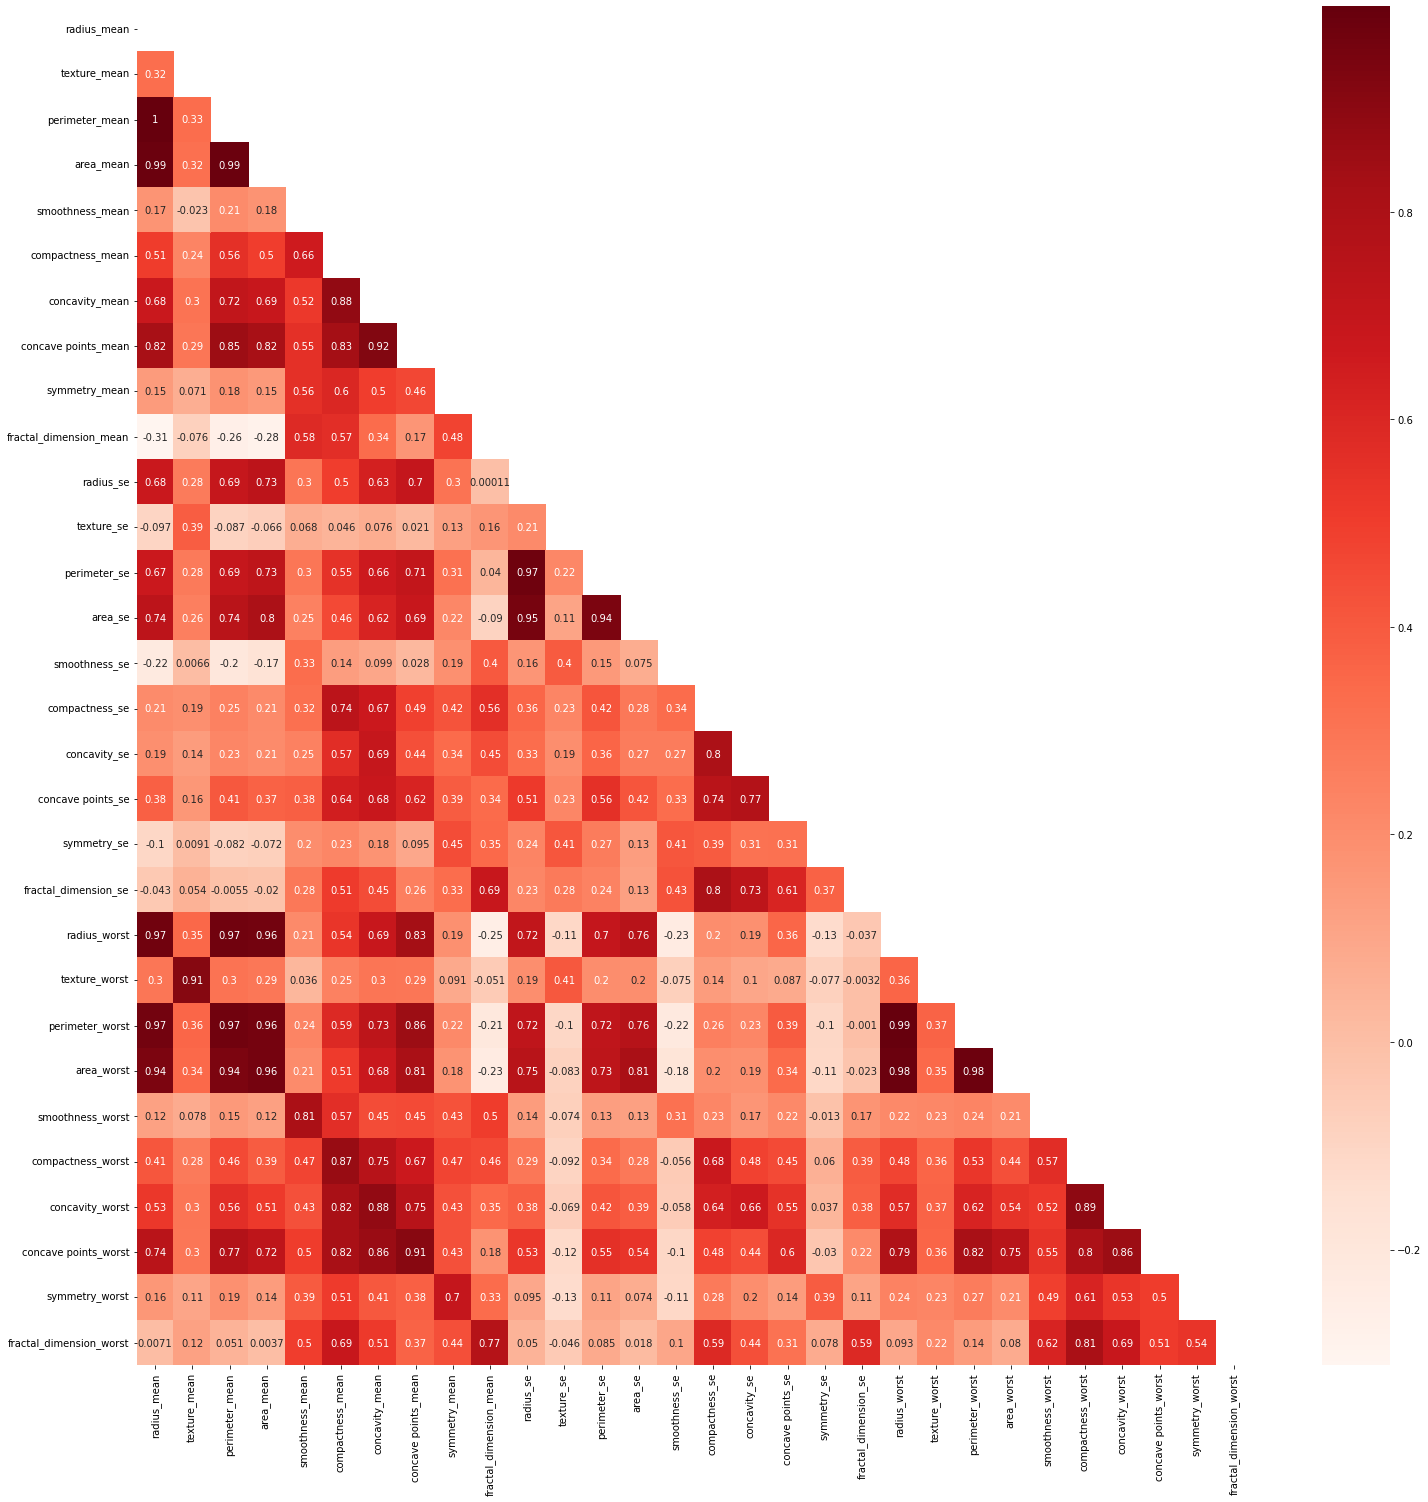

In [97]:
#Analzying the correlation
plt.figure(figsize=(25,25))
mask=np.triu(np.ones_like(dataset.corr()))
sns.heatmap(dataset.corr(), cmap="Reds", annot=True, mask=mask)

In [98]:
#Deleting variables with correlation more than 0.9 and less than -0.9
correlation = dataset.corr()
cols= np.full((correlation.shape[0],), True, dtype=bool)
for i in range(correlation.shape[0]):
  for j in range(i+1, correlation.shape[0]):
    if correlation.iloc[i,j] >= 0.9:
      cols[j]=False
new_cols=dataset.columns[cols]
dataset= dataset[new_cols]

In [99]:
cols


array([ True,  True, False, False,  True,  True,  True, False,  True,
        True,  True,  True, False, False,  True,  True,  True,  True,
        True,  True, False, False, False, False,  True,  True,  True,
       False,  True,  True])

In [100]:
dataset.shape

(569, 20)

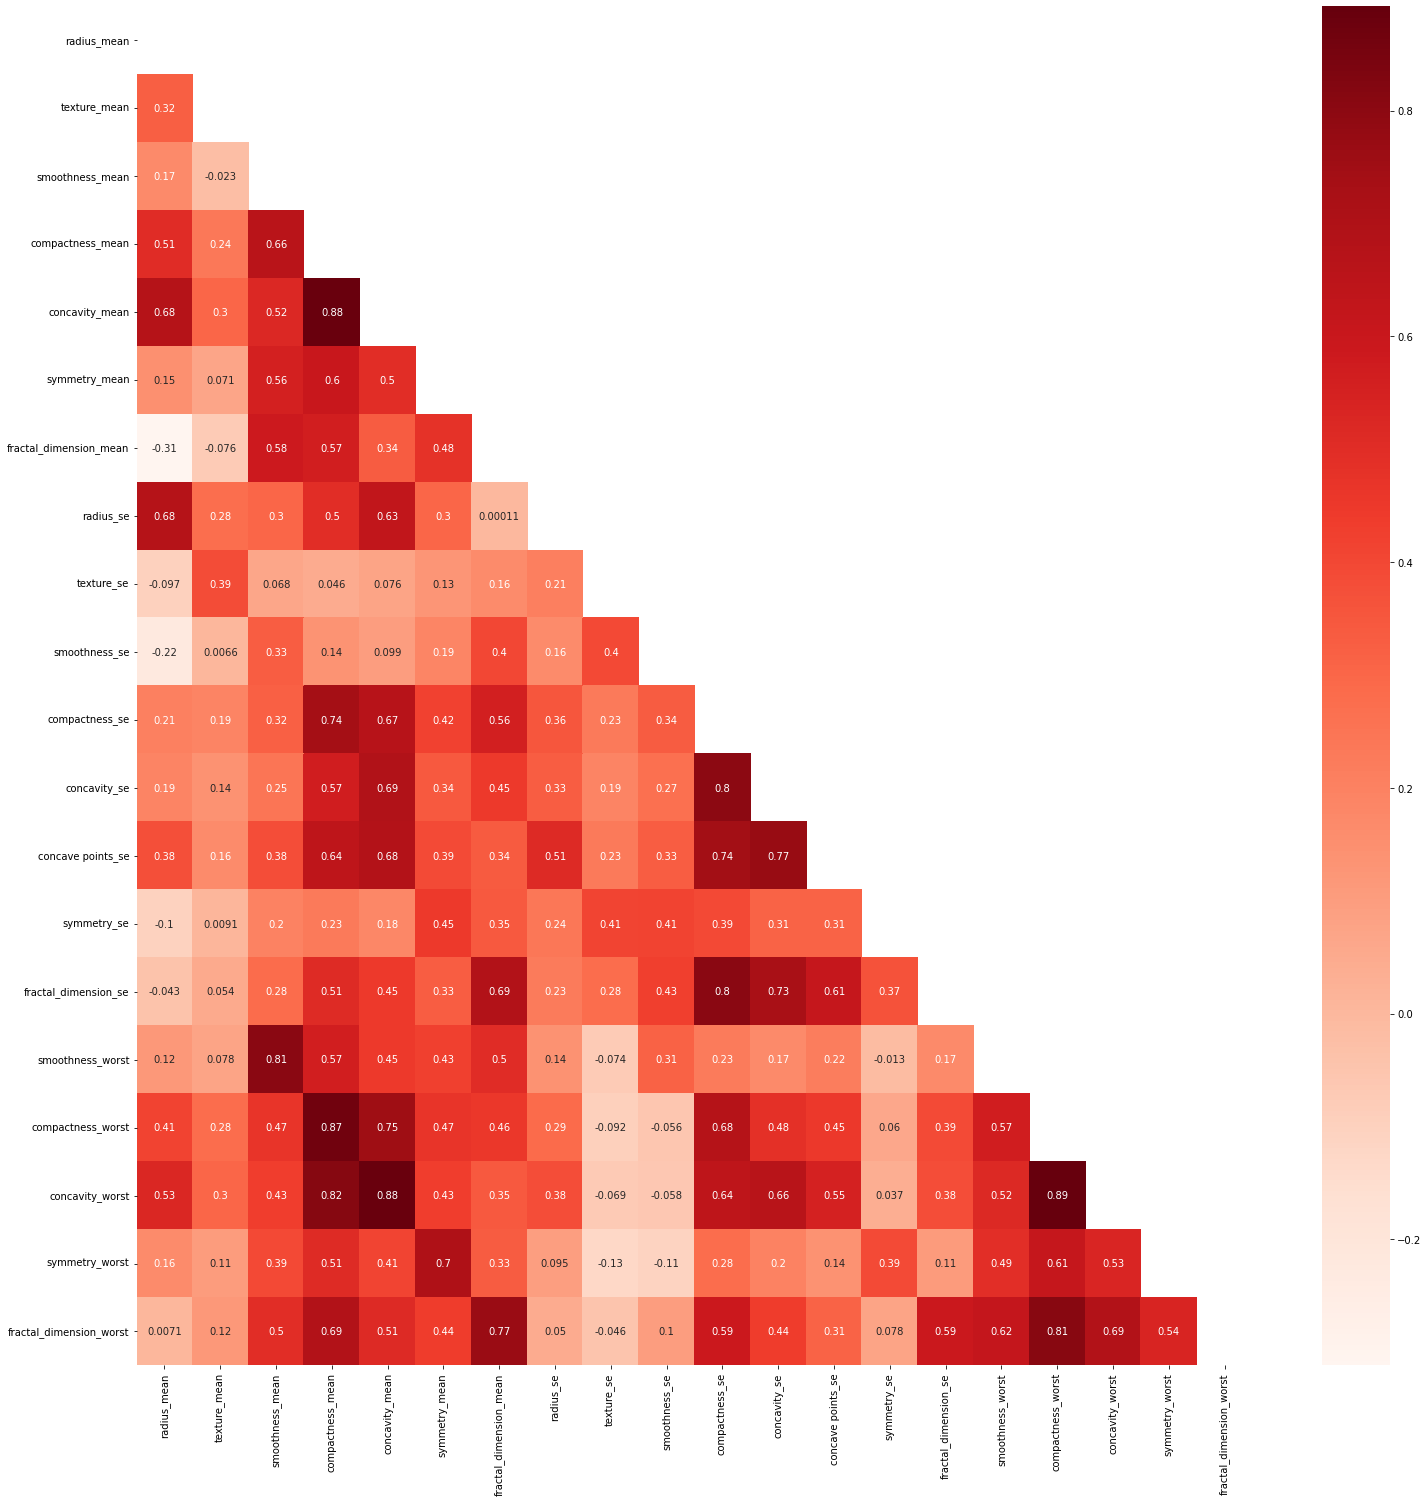

In [101]:
#Analizando  la correlación
plt.figure(figsize=(25,25))
mask=np.triu(np.ones_like(dataset.corr()))
sns.heatmap(dataset.corr(), cmap="Reds", annot=True, mask=mask);

En lo que respecta al análisis del heatmaps, se fijó un valor superior a 0.88 para considerarse un problema de multicolinealidad. Se encontraron diversas correlaciones altas entre las variables **radius, area y perimeter (mean, se y worst)**, esto debido posiblemente a que la información presentada por las mismas no es tan distinta una de otras, ya que todas se refieren al tamaño físico de la célula; asimismo, también se encontraron otras variables con este problema como **concavity, concave points y compactness**, por lo que es necesario eliminar alguna de ellas y quedarse con la variable que aporte mayor información al modelo, con el fin de que nuestro modelo no se vea afectado por este problema de multicolinealidad.

#Modelamiento 

LR

##Target Encoding

In [102]:
y=pd.DataFrame(y)

In [103]:
## Just encoding the target
le = LabelEncoder()
y.diagnosis = le.fit_transform(y.diagnosis)
y.head()

,diagnosis
0,1
1,1
2,1
3,1
4,1


Malignant = 1, Benign = 0

##Modelos de clasificación (Prueba general)

In [104]:
print(dataset_backup['diagnosis'].value_counts())
print(dataset_backup['diagnosis'].value_counts(normalize=True))

B    357
M    212
Name: diagnosis, dtype: int64
B    0.627417
M    0.372583
Name: diagnosis, dtype: float64


In [105]:
X_train, X_test, y_train, y_test = train_test_split(dataset, y, test_size=0.25, random_state=20)

In [106]:
from sklearn.metrics import classification_report
from sklearn.metrics import log_loss
from sklearn.metrics import confusion_matrix

def mostrar_resultados(y_test, y_pred):
    labels=[ "Benign (0)", "Malignant (1)"]
    conf_matrix = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(12, 12))
    sns.heatmap(conf_matrix, xticklabels=labels, yticklabels=labels, annot=True, fmt="d");
    plt.title("Confusion matrix")
    plt.ylabel('True class')
    plt.xlabel('Predicted class')
    plt.show()
    print (classification_report(y_test, y_pred))

In [107]:
### selector de variables
rf_clf = RandomForestClassifier(n_estimators=100,random_state =123) #100 árbooles

# Train the model
rf_clf.fit(dataset.values,y.values.ravel())

## ordenando  las mejores variables
features = []
for feature in zip(dataset.columns, rf_clf.feature_importances_):
    features.append(feature)
    
features_total = pd.DataFrame(features,columns=['Variables','Gain']).sort_values('Gain', ascending=False)

In [108]:
features_total #importancia de variables

,Variables,Gain
0,radius_mean,0.243778
4,concavity_mean,0.164684
17,concavity_worst,0.120466
7,radius_se,0.083969
3,compactness_mean,0.058144
1,texture_mean,0.044656
16,compactness_worst,0.040259
11,concavity_se,0.037887
12,concave points_se,0.029947
18,symmetry_worst,0.025481


In [109]:
sfm = SelectFromModel(rf_clf, threshold=0.03) # Con esas varibales explico el 80% del target

# Train the selector
sfm.fit(dataset, y)

# Print the names of the most important features

variables = []
for feature_list_index in sfm.get_support(indices=True):
    variables.append(dataset.columns[feature_list_index])
    #variables
    
#features_total
variables

['radius_mean',
 'texture_mean',
 'compactness_mean',
 'concavity_mean',
 'radius_se',
 'concavity_se',
 'compactness_worst',
 'concavity_worst']

In [110]:
len(variables)

8

In [111]:
## Usando la mejor selecciónde variables
best_X_train = X_train[variables]
best_X_test  = X_test[variables]

In [112]:
# Function to fit the classify and record its metrics
def pipeline(clas, X_train, y_train, X_test, y_test, **kwargs):
    # Dictionary to hold the properties
    clas_props = {}
    
    # Initialize and fit the classify 
    classify = clas(**kwargs)
    classify.probability = True
    classify.fit(X_train, y_train)
    y_train_pre =  classify.predict_proba(X_train)[:,1]
    y_test_pre =  classify.predict_proba(X_test)[:,1]

    # Clasificación predicha -> transformando a binario (0 y 1)
    clasificacion_predict_train= np.where(y_train_pre<0.5, 0, 1)
    clasificacion_predict_test= np.where(y_test_pre<0.5, 0, 1)

    # Store the metrics for the classify
    clas_props["name"] = clas.__name__
    clas_props["train_accuracy"] = accuracy_score(y_train, clasificacion_predict_train)
    clas_props["test_accuracy"] = accuracy_score(y_test, clasificacion_predict_test)
    clas_props["precision"] = precision_score(y_test, clasificacion_predict_test)
    clas_props["recall"] = recall_score(y_test, clasificacion_predict_test)

    mostrar_resultados(y_test, clasificacion_predict_test)
    
    return clas_props

In [113]:
def execute_pipeline():
    # Create the list of algorithms
    classifys = [
        LogisticRegression,
        DecisionTreeClassifier,
        RandomForestClassifier,
        SVC,
        XGBClassifier,
        LGBMClassifier,
        CatBoostClassifier
    ]
    
    # To store the properties for each classify
    props = []
    
    """
    Iterate thorugh the list of classify,
    passing each thorugh the pipeline and
    storing its properites
    """ 
    for clas in classifys:
        properites = pipeline(clas, best_X_train, y_train, best_X_test, y_test)
        props.append(properites)
        
    return props

In [114]:
# Consolidate the properties into a DataFrame
def get_properties():
    # Obtain the properties after executing the pipeline
    properties = execute_pipeline()
    
    # Extract each individual property of the classify
    names = [prop["name"] for prop in properties]
    train_scores = [prop["train_accuracy"] for prop in properties]
    test_scores = [prop["test_accuracy"] for prop in properties]
    precision = [prop["precision"] for prop in properties]
    recall = [prop["recall"] for prop in properties]
    
    # Create a DataFrame from these properties
    df = pd.DataFrame(index=names, 
                    data = {
                            "Training auccuracy": train_scores,
                            "Testing auccuracy": test_scores,
                            "Precision": precision,
                            "Recall": recall
                      }
                  )
    
    return df

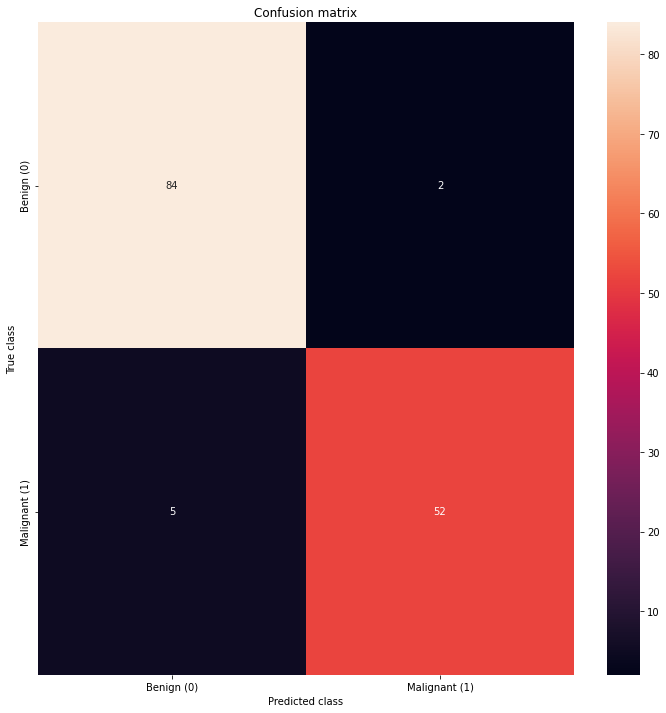

              precision    recall  f1-score   support

           0       0.94      0.98      0.96        86
           1       0.96      0.91      0.94        57

    accuracy                           0.95       143
   macro avg       0.95      0.94      0.95       143
weighted avg       0.95      0.95      0.95       143



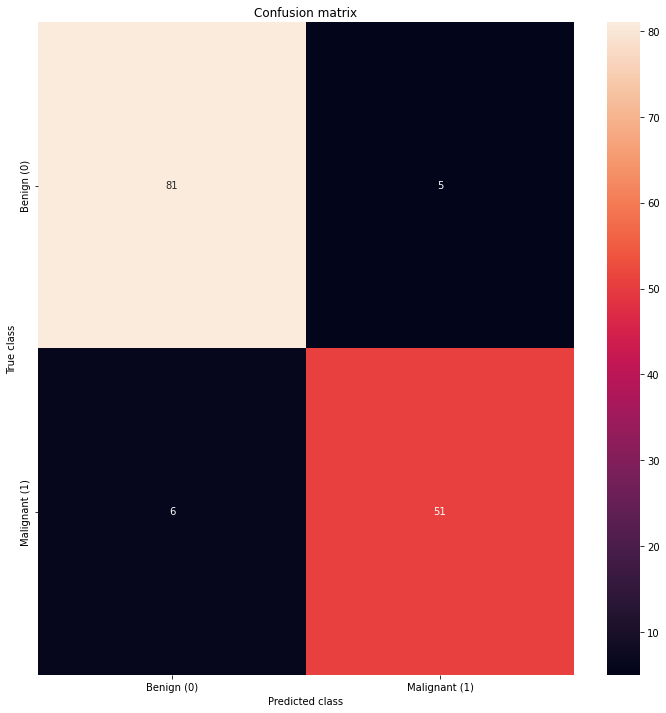

              precision    recall  f1-score   support

           0       0.93      0.94      0.94        86
           1       0.91      0.89      0.90        57

    accuracy                           0.92       143
   macro avg       0.92      0.92      0.92       143
weighted avg       0.92      0.92      0.92       143



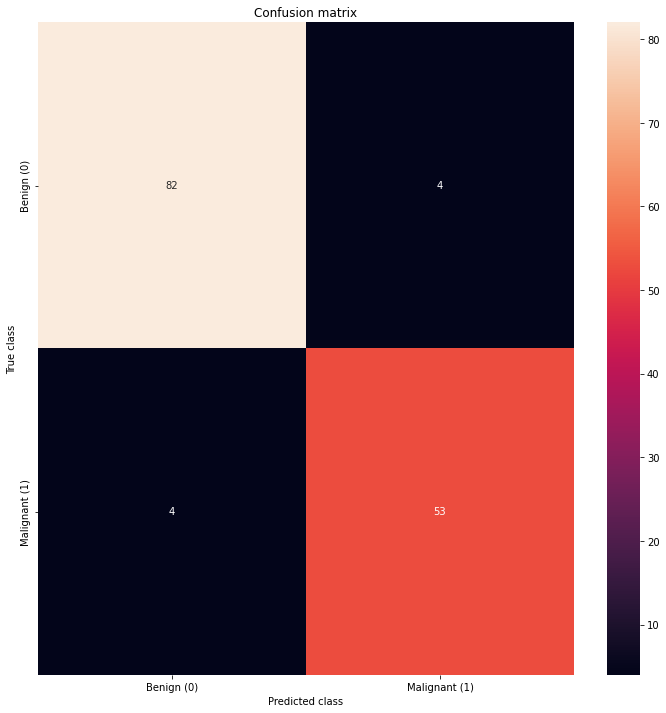

              precision    recall  f1-score   support

           0       0.95      0.95      0.95        86
           1       0.93      0.93      0.93        57

    accuracy                           0.94       143
   macro avg       0.94      0.94      0.94       143
weighted avg       0.94      0.94      0.94       143



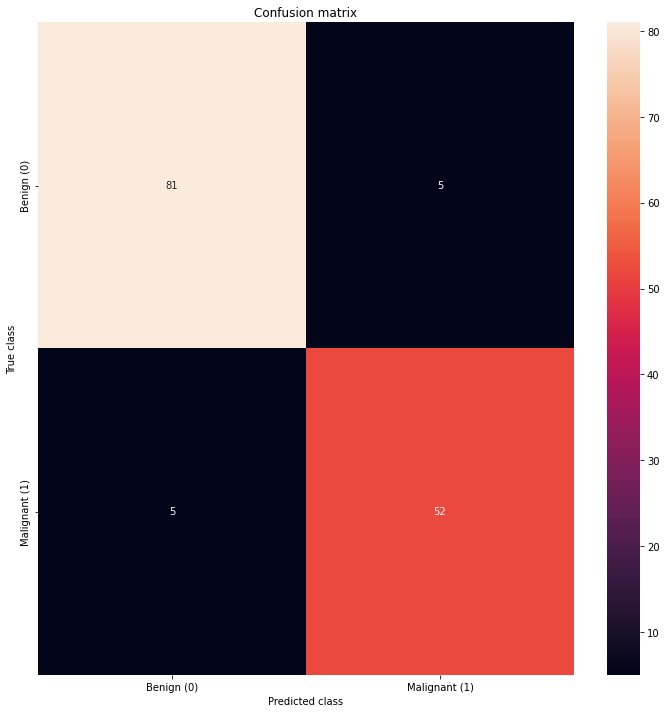

              precision    recall  f1-score   support

           0       0.94      0.94      0.94        86
           1       0.91      0.91      0.91        57

    accuracy                           0.93       143
   macro avg       0.93      0.93      0.93       143
weighted avg       0.93      0.93      0.93       143



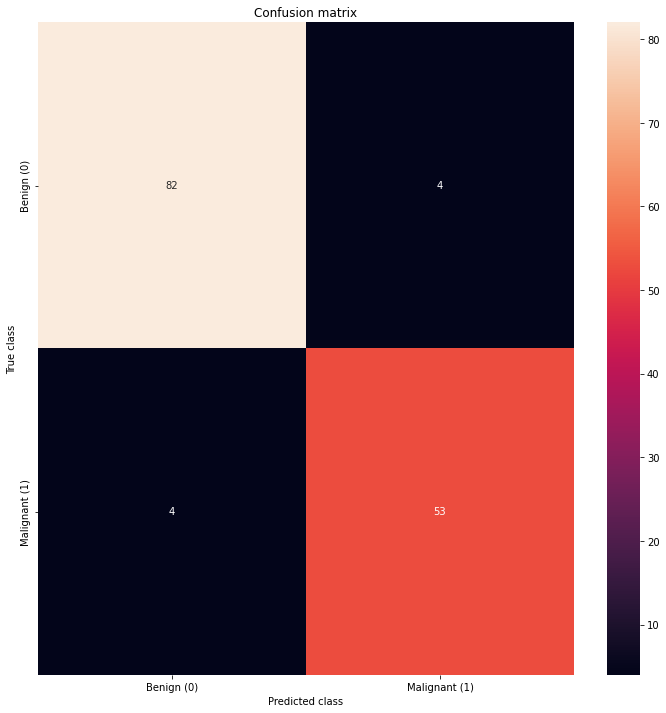

              precision    recall  f1-score   support

           0       0.95      0.95      0.95        86
           1       0.93      0.93      0.93        57

    accuracy                           0.94       143
   macro avg       0.94      0.94      0.94       143
weighted avg       0.94      0.94      0.94       143



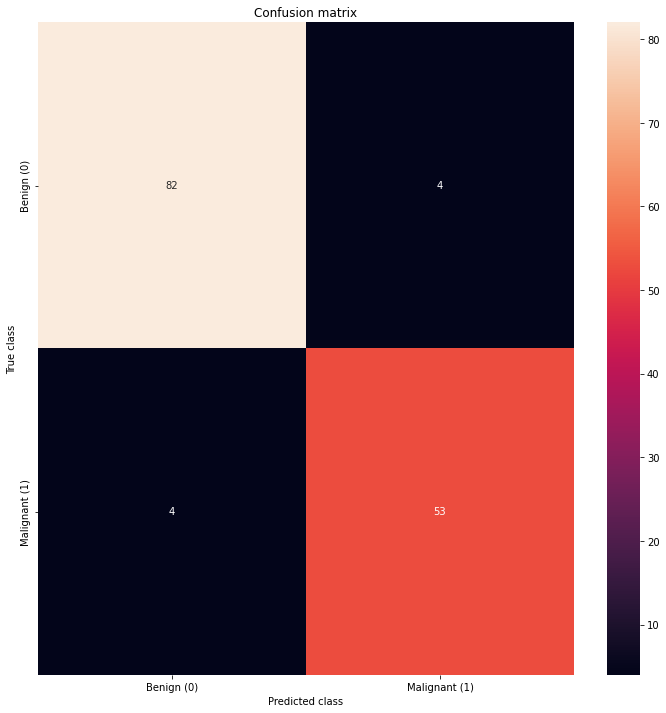

              precision    recall  f1-score   support

           0       0.95      0.95      0.95        86
           1       0.93      0.93      0.93        57

    accuracy                           0.94       143
   macro avg       0.94      0.94      0.94       143
weighted avg       0.94      0.94      0.94       143

Learning rate set to 0.007156
0:	learn: 0.6816109	total: 4.07ms	remaining: 4.07s
1:	learn: 0.6727170	total: 6.69ms	remaining: 3.34s
2:	learn: 0.6632722	total: 12.2ms	remaining: 4.04s
3:	learn: 0.6517172	total: 16.2ms	remaining: 4.04s
4:	learn: 0.6440160	total: 18.9ms	remaining: 3.75s
5:	learn: 0.6352085	total: 21.4ms	remaining: 3.55s
6:	learn: 0.6248269	total: 24.1ms	remaining: 3.42s
7:	learn: 0.6163753	total: 26.6ms	remaining: 3.3s
8:	learn: 0.6073873	total: 29.2ms	remaining: 3.22s
9:	learn: 0.5985340	total: 31.8ms	remaining: 3.15s
10:	learn: 0.5896763	total: 34.3ms	remaining: 3.08s
11:	learn: 0.5806956	total: 36.9ms	remaining: 3.04s
12:	learn: 0.5720765	total: 39

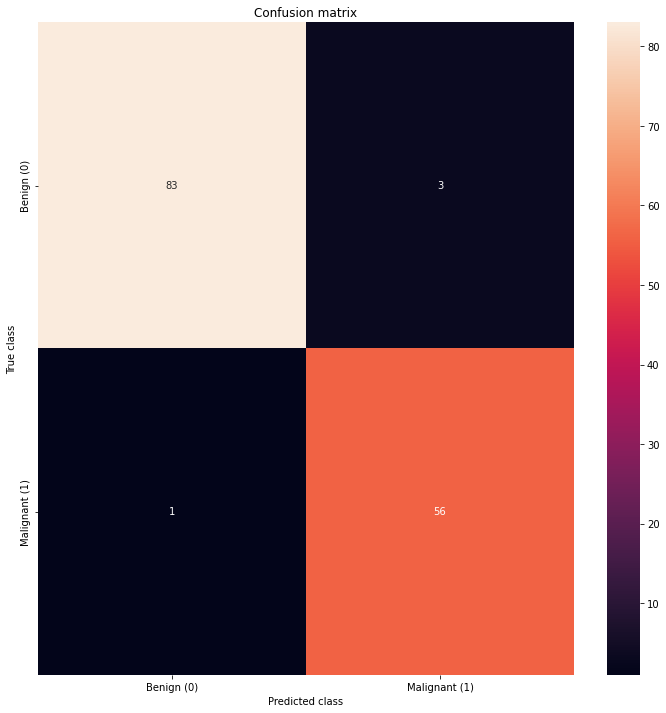

              precision    recall  f1-score   support

           0       0.99      0.97      0.98        86
           1       0.95      0.98      0.97        57

    accuracy                           0.97       143
   macro avg       0.97      0.97      0.97       143
weighted avg       0.97      0.97      0.97       143



,Training auccuracy,Testing auccuracy,Precision,Recall
LogisticRegression,0.927230,0.951049,0.962963,0.912281
DecisionTreeClassifier,1.000000,0.923077,0.910714,0.894737
RandomForestClassifier,1.000000,0.944056,0.929825,0.929825
SVC,0.894366,0.930070,0.912281,0.912281
XGBClassifier,1.000000,0.944056,0.929825,0.929825
LGBMClassifier,1.000000,0.944056,0.929825,0.929825
CatBoostClassifier,1.000000,0.972028,0.949153,0.982456


In [115]:
properties = get_properties()
properties

Text(0, 0.5, 'Score')

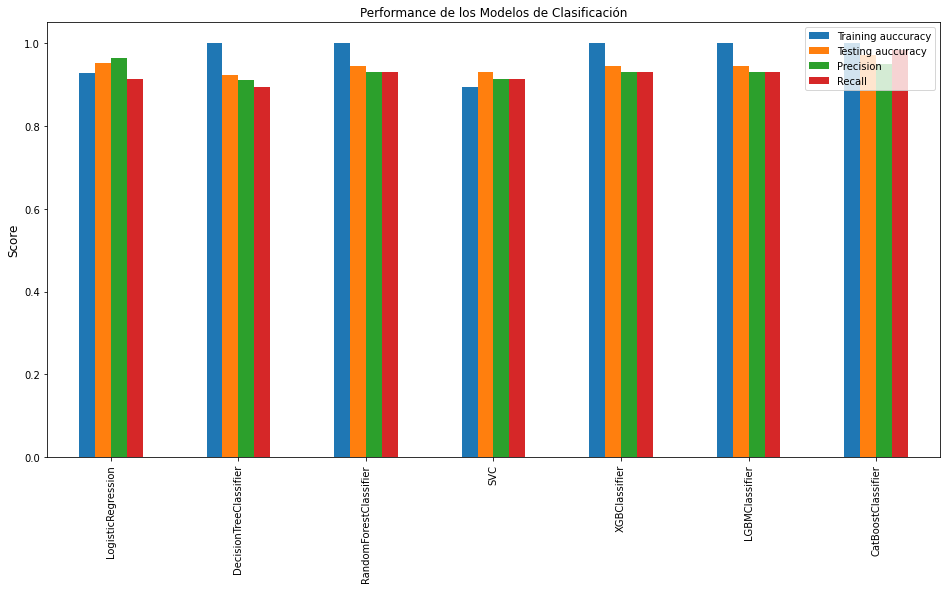

In [116]:
# Plot to compare the performance of the algorithms on both datasets
ax = properties[["Training auccuracy", "Testing auccuracy", "Precision", "Recall"]].plot(kind="bar",title="Performance de los Modelos de Clasificación", figsize=(16, 8))
ax.set_ylabel("Score", fontsize="large")

##Best model

Regresión logística

In [117]:
# Initialize and fit the model
best_model = LogisticRegression() 
best_model.fit(best_X_train, y_train)


# Separate the features and the target variable
predict_train_LR = best_model.predict_proba(best_X_train)[:,1]
predict_test_LR = best_model.predict_proba(best_X_test)[:,1]

In [118]:
# Print scores on both
print("Auc o Roc on training in LogisticRegression data : {:.3f}".format(roc_auc_score(y_train, predict_train_LR)))
print("Auc o Roc on testing in LogisticRegression  data : {:.3f}".format(roc_auc_score(y_test, predict_test_LR)))

Auc o Roc on training in LogisticRegression data : 0.979
Auc o Roc on testing in LogisticRegression  data : 0.994


In [119]:
# Clasificación predicha
clasificacion_predict_train_LR= np.where(predict_train_LR<0.5, 0, 1)
clasificacion_predict_test_LR= np.where(predict_test_LR<0.5, 0, 1)

print("Accuracy on training in LogisticRegression data : {:.3f}".format(accuracy_score(y_train, clasificacion_predict_train_LR)))
print("Accuracy on testing in LogisticRegression  data : {:.3f}".format(accuracy_score(y_test,clasificacion_predict_test_LR)))
print("Precision on testing in LogisticRegression  data : {:.3f}".format(precision_score(y_test,clasificacion_predict_test_LR)))

Accuracy on training in LogisticRegression data : 0.927
Accuracy on testing in LogisticRegression  data : 0.951
Precision on testing in LogisticRegression  data : 0.963


LOGISTIC REGRESSION confusion matrix


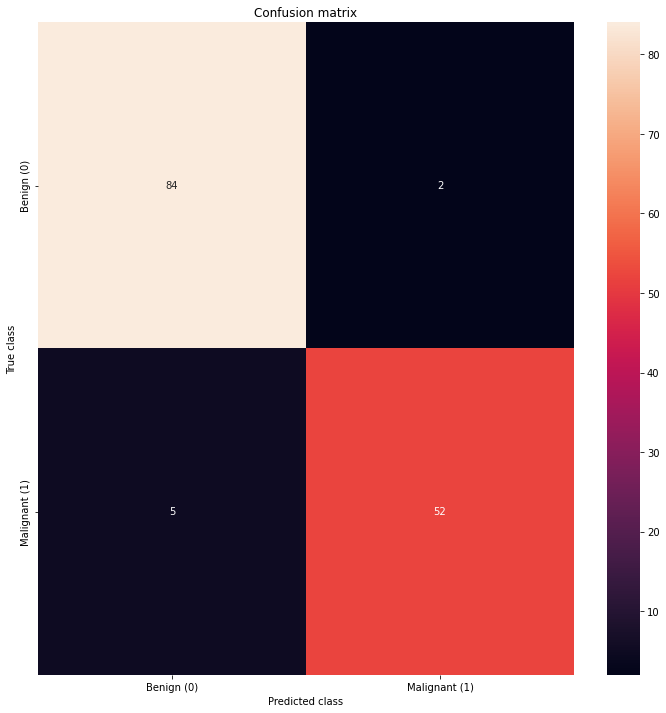

              precision    recall  f1-score   support

           0       0.94      0.98      0.96        86
           1       0.96      0.91      0.94        57

    accuracy                           0.95       143
   macro avg       0.95      0.94      0.95       143
weighted avg       0.95      0.95      0.95       143



In [120]:
print("LOGISTIC REGRESSION confusion matrix")
mostrar_resultados(y_test, clasificacion_predict_test_LR)

In [121]:
predict_LR_test = best_model.predict(best_X_test)
predict_LR_test

array([0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0,
       1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1,
       0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0])

In [122]:
print(metrics.classification_report(y_test, predict_LR_test))

              precision    recall  f1-score   support

           0       0.94      0.98      0.96        86
           1       0.96      0.91      0.94        57

    accuracy                           0.95       143
   macro avg       0.95      0.94      0.95       143
weighted avg       0.95      0.95      0.95       143



##Random Hyperparameter Grid
Regresión logística



In [123]:
from pprint import pprint
# Look at parameters used by our current forest
print('Parameters currently in use:\n')
pprint(best_model.get_params()) 

Parameters currently in use:

{'C': 1.0,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 100,
 'multi_class': 'auto',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': None,
 'solver': 'lbfgs',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}


In [124]:
random_grid = {'penalty' : ['l1', 'l2', 'elasticnet', 'none'],
    'C' : np.logspace(-4, 4, 20),
    'solver' : ['lbfgs','newton-cg','liblinear','sag','saga'],
    'max_iter' : [100, 1000,2500, 5000]
    }
random_grid

{'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
        4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
        2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
        1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
        5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
 'max_iter': [100, 1000, 2500, 5000],
 'penalty': ['l1', 'l2', 'elasticnet', 'none'],
 'solver': ['lbfgs', 'newton-cg', 'liblinear', 'sag', 'saga']}

In [125]:
best_X= dataset[variables]
best_X.columns

Index(['radius_mean', 'texture_mean', 'compactness_mean', 'concavity_mean',
       'radius_se', 'concavity_se', 'compactness_worst', 'concavity_worst'],
      dtype='object')

In [126]:
LR_random = RandomizedSearchCV(estimator = best_model, param_distributions = random_grid, cv = 5, verbose=2, random_state=1416, n_jobs = -1)
# Fit the random search model
LR_random.fit(best_X, y)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


RandomizedSearchCV(cv=5, estimator=LogisticRegression(), n_jobs=-1,
                   param_distributions={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                                        'max_iter': [100, 1000, 2500, 5000],
                                        'penalty': ['l1', 'l2', 'elasticnet',
                                                    'none'],
                                        'solver': ['lbfgs', 'newton-cg',
                                                   'liblinear', 'sag',
                                                   'saga']},
                   random_state=1416, verbose=2)

In [127]:
LR_random.best_params_

{'C': 10000.0, 'max_iter': 100, 'penalty': 'l2', 'solver': 'newton-cg'}

In [128]:
def evaluate(model, test_features, test_labels):
    predictions = model.predict(test_features)
    accuracy = accuracy_score(test_labels,predictions)
    precision = precision_score(test_labels,predictions)
    print('Model Performance')
    print('Accuracy = {:.12g}%.'.format(accuracy))
    print('Precision = {:.12g}%.'.format(precision))
    return accuracy

In [129]:
def evaluate2(model, test_features, test_labels):
    predictions = model.predict(test_features)
    precision = precision_score(test_labels,predictions)
    return precision

In [130]:
base_accuracy = evaluate(best_model, best_X_test, y_test)
base_precision = evaluate2(best_model, best_X_test, y_test)

best_random = LR_random.best_estimator_
best_random.fit(best_X_train, y_train)
random_accuracy = evaluate(best_random, best_X_test, y_test)
random_precision = evaluate2(best_random, best_X_test, y_test)
print('Accuracy Improvement of {:.12g}%.'.format( 100 * (random_accuracy - base_accuracy) / base_accuracy))
print('Precision Improvement of {:.12g}%.'.format( 100 * (random_precision - base_precision) / base_precision))

Model Performance
Accuracy = 0.951048951049%.
Precision = 0.962962962963%.
Model Performance
Accuracy = 0.965034965035%.
Precision = 0.948275862069%.
Accuracy Improvement of 1.47058823529%.
Precision Improvement of -1.52519893899%.


##Best model
Catboost


In [131]:
# Initialize and fit the model
best_model = CatBoostClassifier()
best_model.fit(best_X_train, y_train)


# Separate the features and the target variable
predict_train_CB = best_model.predict_proba(best_X_train)[:,1]
predict_test_CB = best_model.predict_proba(best_X_test)[:,1]

Learning rate set to 0.007156
0:	learn: 0.6816109	total: 7.22ms	remaining: 7.22s
1:	learn: 0.6727170	total: 10.6ms	remaining: 5.27s
2:	learn: 0.6632722	total: 15.8ms	remaining: 5.24s
3:	learn: 0.6517172	total: 21.4ms	remaining: 5.33s
4:	learn: 0.6440160	total: 24ms	remaining: 4.78s
5:	learn: 0.6352085	total: 26.5ms	remaining: 4.38s
6:	learn: 0.6248269	total: 28.9ms	remaining: 4.1s
7:	learn: 0.6163753	total: 31.2ms	remaining: 3.87s
8:	learn: 0.6073873	total: 33.5ms	remaining: 3.69s
9:	learn: 0.5985340	total: 35.9ms	remaining: 3.56s
10:	learn: 0.5896763	total: 38.3ms	remaining: 3.45s
11:	learn: 0.5806956	total: 40.7ms	remaining: 3.35s
12:	learn: 0.5720765	total: 43ms	remaining: 3.27s
13:	learn: 0.5650865	total: 45.5ms	remaining: 3.21s
14:	learn: 0.5566417	total: 47.9ms	remaining: 3.15s
15:	learn: 0.5482309	total: 50.8ms	remaining: 3.12s
16:	learn: 0.5404868	total: 53.2ms	remaining: 3.08s
17:	learn: 0.5323468	total: 55.6ms	remaining: 3.03s
18:	learn: 0.5243069	total: 58ms	remaining: 3s
19

In [132]:
# Print scores on both
print("Auc o Roc on training in LogisticRegression data : {:.3f}".format(roc_auc_score(y_train, predict_train_CB)))
print("Auc o Roc on testing in LogisticRegression  data : {:.3f}".format(roc_auc_score(y_test, predict_test_CB)))

Auc o Roc on training in LogisticRegression data : 1.000
Auc o Roc on testing in LogisticRegression  data : 0.994


In [133]:
# Clasificación predicha
clasificacion_predict_train_CB= np.where(predict_train_CB<0.5, 0, 1)
clasificacion_predict_test_CB= np.where(predict_test_CB<0.5, 0, 1)

print("Accuracy on training in LogisticRegression data : {:.3f}".format(accuracy_score(y_train, clasificacion_predict_train_CB)))
print("Accuracy on testing in LogisticRegression  data : {:.3f}".format(accuracy_score(y_test,clasificacion_predict_test_CB)))
print("Precision on testing in LogisticRegression  data : {:.3f}".format(precision_score(y_test,clasificacion_predict_test_CB)))

Accuracy on training in LogisticRegression data : 1.000
Accuracy on testing in LogisticRegression  data : 0.972
Precision on testing in LogisticRegression  data : 0.949


CATBOOST confusion matrix


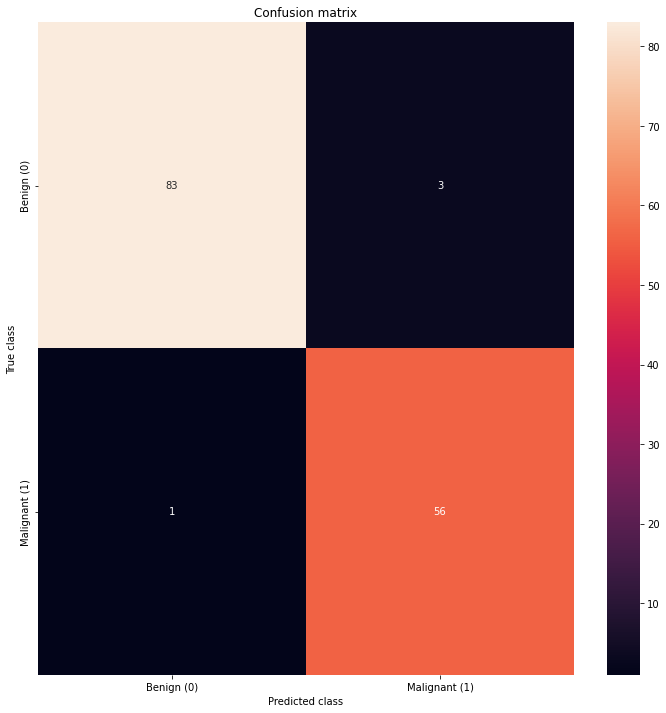

              precision    recall  f1-score   support

           0       0.99      0.97      0.98        86
           1       0.95      0.98      0.97        57

    accuracy                           0.97       143
   macro avg       0.97      0.97      0.97       143
weighted avg       0.97      0.97      0.97       143



In [134]:
print("CATBOOST confusion matrix")
mostrar_resultados(y_test, clasificacion_predict_test_CB)

In [135]:
predict_CB_test = best_model.predict(best_X_test)
predict_CB_test

array([0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0,
       1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1,
       0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1,
       0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0])

In [136]:
print(metrics.classification_report(y_test, predict_CB_test))

              precision    recall  f1-score   support

           0       0.99      0.97      0.98        86
           1       0.95      0.98      0.97        57

    accuracy                           0.97       143
   macro avg       0.97      0.97      0.97       143
weighted avg       0.97      0.97      0.97       143



##Random Hyperparameter Grid

Catboost

In [137]:
from pprint import pprint
# Look at parameters used by our current forest
print('Parameters currently in use:\n')
pprint(best_model.get_all_params()) 

Parameters currently in use:

{'auto_class_weights': 'None',
 'bayesian_matrix_reg': 0.10000000149011612,
 'best_model_min_trees': 1,
 'boost_from_average': False,
 'boosting_type': 'Plain',
 'bootstrap_type': 'MVS',
 'border_count': 254,
 'class_names': [0, 1],
 'classes_count': 0,
 'depth': 6,
 'eval_metric': 'Logloss',
 'feature_border_type': 'GreedyLogSum',
 'force_unit_auto_pair_weights': False,
 'grow_policy': 'SymmetricTree',
 'iterations': 1000,
 'l2_leaf_reg': 3,
 'leaf_estimation_backtracking': 'AnyImprovement',
 'leaf_estimation_iterations': 10,
 'leaf_estimation_method': 'Newton',
 'learning_rate': 0.007156000006943941,
 'loss_function': 'Logloss',
 'max_leaves': 64,
 'min_data_in_leaf': 1,
 'model_shrink_mode': 'Constant',
 'model_shrink_rate': 0,
 'model_size_reg': 0.5,
 'nan_mode': 'Min',
 'penalties_coefficient': 1,
 'pool_metainfo_options': {'tags': {}},
 'posterior_sampling': False,
 'random_seed': 0,
 'random_strength': 1,
 'rsm': 1,
 'sampling_frequency': 'PerTree',

In [138]:
random_grid = {'depth'         : [4,5,6,7,8,9, 10],
                 'learning_rate' : [0.01,0.02,0.03,0.04],
                  'iterations'    : [10, 20,30,40,50,60,70,80,90, 100]
                 }
random_grid

{'depth': [4, 5, 6, 7, 8, 9, 10],
 'iterations': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100],
 'learning_rate': [0.01, 0.02, 0.03, 0.04]}

In [139]:
best_X= dataset[variables]
best_X.columns

Index(['radius_mean', 'texture_mean', 'compactness_mean', 'concavity_mean',
       'radius_se', 'concavity_se', 'compactness_worst', 'concavity_worst'],
      dtype='object')

In [140]:
CB_random = RandomizedSearchCV(estimator = best_model, param_distributions = random_grid, cv = 5, verbose=2, random_state=1416, n_jobs = -1)
# Fit the random search model
CB_random.fit(best_X, y)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
0:	learn: 0.6695436	total: 12ms	remaining: 826ms
1:	learn: 0.6521228	total: 18.4ms	remaining: 626ms
2:	learn: 0.6319784	total: 25ms	remaining: 558ms
3:	learn: 0.6126165	total: 31.8ms	remaining: 525ms
4:	learn: 0.5953702	total: 38.3ms	remaining: 498ms
5:	learn: 0.5779932	total: 44.8ms	remaining: 478ms
6:	learn: 0.5633784	total: 51.4ms	remaining: 463ms
7:	learn: 0.5494621	total: 58ms	remaining: 449ms
8:	learn: 0.5362736	total: 65.2ms	remaining: 442ms
9:	learn: 0.5211032	total: 71.9ms	remaining: 432ms
10:	learn: 0.5073621	total: 78.4ms	remaining: 420ms
11:	learn: 0.4949795	total: 85.1ms	remaining: 411ms
12:	learn: 0.4836117	total: 91.6ms	remaining: 402ms
13:	learn: 0.4716927	total: 105ms	remaining: 420ms
14:	learn: 0.4605837	total: 117ms	remaining: 429ms
15:	learn: 0.4495577	total: 124ms	remaining: 418ms
16:	learn: 0.4389874	total: 130ms	remaining: 407ms
17:	learn: 0.4283081	total: 137ms	remaining: 396ms
18:	learn: 0.4193041	tot

RandomizedSearchCV(cv=5,
                   estimator=<catboost.core.CatBoostClassifier object at 0x7ff6cefd5710>,
                   n_jobs=-1,
                   param_distributions={'depth': [4, 5, 6, 7, 8, 9, 10],
                                        'iterations': [10, 20, 30, 40, 50, 60,
                                                       70, 80, 90, 100],
                                        'learning_rate': [0.01, 0.02, 0.03,
                                                          0.04]},
                   random_state=1416, verbose=2)

In [141]:
CB_random.best_params_

{'depth': 8, 'iterations': 70, 'learning_rate': 0.04}

In [142]:
base_accuracy = evaluate(best_model, best_X_test, y_test)
base_precision = evaluate2(best_model, best_X_test, y_test)

best_random = CB_random.best_estimator_
best_random.fit(best_X_train, y_train)
random_accuracy = evaluate(best_random, best_X_test, y_test)
random_precision = evaluate2(best_random, best_X_test, y_test)
print('Accuracy Improvement of {:.12g}%.'.format( 100 * (random_accuracy - base_accuracy) / base_accuracy))
print('Precision Improvement of {:.12g}%.'.format( 100 * (random_precision - base_precision) / base_precision))

Model Performance
Accuracy = 0.972027972028%.
Precision = 0.949152542373%.
0:	learn: 0.6705164	total: 7.58ms	remaining: 523ms
1:	learn: 0.6540173	total: 14.1ms	remaining: 478ms
2:	learn: 0.6344534	total: 20.6ms	remaining: 461ms
3:	learn: 0.6155743	total: 27.7ms	remaining: 458ms
4:	learn: 0.6000589	total: 34.6ms	remaining: 450ms
5:	learn: 0.5834466	total: 41ms	remaining: 438ms
6:	learn: 0.5694107	total: 47.5ms	remaining: 428ms
7:	learn: 0.5554183	total: 55.1ms	remaining: 427ms
8:	learn: 0.5430711	total: 62ms	remaining: 420ms
9:	learn: 0.5283139	total: 68.7ms	remaining: 412ms
10:	learn: 0.5158992	total: 75.1ms	remaining: 403ms
11:	learn: 0.5045788	total: 82.1ms	remaining: 397ms
12:	learn: 0.4939213	total: 89ms	remaining: 390ms
13:	learn: 0.4822066	total: 95.8ms	remaining: 383ms
14:	learn: 0.4721828	total: 102ms	remaining: 375ms
15:	learn: 0.4629930	total: 109ms	remaining: 368ms
16:	learn: 0.4518691	total: 116ms	remaining: 361ms
17:	learn: 0.4417904	total: 122ms	remaining: 353ms
18:	learn

##Best model

SVM

In [143]:
# Initialize and fit the model
best_model = SVC(probability=True) 
best_model.fit(best_X_train, y_train)


# Separate the features and the target variable
predict_train_SVM = best_model.predict_proba(best_X_train)[:,1]
predict_test_SVM = best_model.predict_proba(best_X_test)[:,1]

In [144]:
# Print scores on both
print("Auc o Roc on training in LogisticRegression data : {:.3f}".format(roc_auc_score(y_train, predict_train_SVM)))
print("Auc o Roc on testing in LogisticRegression  data : {:.3f}".format(roc_auc_score(y_test, predict_test_SVM)))

Auc o Roc on training in LogisticRegression data : 0.957
Auc o Roc on testing in LogisticRegression  data : 0.970


In [145]:
# Clasificación predicha
clasificacion_predict_train_SVM= np.where(predict_train_SVM<0.5, 0, 1)
clasificacion_predict_test_SVM= np.where(predict_test_SVM<0.5, 0, 1)

print("Accuracy on training in LogisticRegression data : {:.3f}".format(accuracy_score(y_train, clasificacion_predict_train_SVM)))
print("Accuracy on testing in LogisticRegression  data : {:.3f}".format(accuracy_score(y_test,clasificacion_predict_test_SVM)))
print("Precision on testing in LogisticRegression  data : {:.3f}".format(precision_score(y_test,clasificacion_predict_test_SVM)))

Accuracy on training in LogisticRegression data : 0.892
Accuracy on testing in LogisticRegression  data : 0.930
Precision on testing in LogisticRegression  data : 0.912


SVM confusion matrix


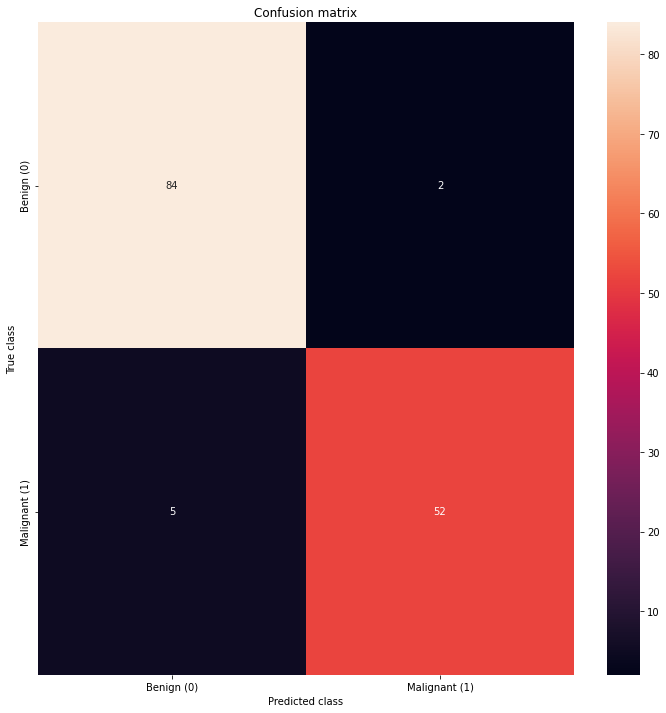

              precision    recall  f1-score   support

           0       0.94      0.98      0.96        86
           1       0.96      0.91      0.94        57

    accuracy                           0.95       143
   macro avg       0.95      0.94      0.95       143
weighted avg       0.95      0.95      0.95       143



In [146]:
print("SVM confusion matrix")
mostrar_resultados(y_test, clasificacion_predict_test_LR)

In [147]:
predict_SVM_test = best_model.predict(best_X_test)
predict_SVM_test

array([0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0,
       1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1,
       0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0])

In [148]:
print(metrics.classification_report(y_test, predict_SVM_test))

              precision    recall  f1-score   support

           0       0.88      0.98      0.93        86
           1       0.96      0.81      0.88        57

    accuracy                           0.91       143
   macro avg       0.92      0.89      0.90       143
weighted avg       0.91      0.91      0.91       143



##Random Hyperparameter Grid

SVM



In [149]:
from pprint import pprint
# Look at parameters used by our current forest
print('Parameters currently in use:\n')
pprint(best_model.get_params()) 

Parameters currently in use:

{'C': 1.0,
 'break_ties': False,
 'cache_size': 200,
 'class_weight': None,
 'coef0': 0.0,
 'decision_function_shape': 'ovr',
 'degree': 3,
 'gamma': 'scale',
 'kernel': 'rbf',
 'max_iter': -1,
 'probability': True,
 'random_state': None,
 'shrinking': True,
 'tol': 0.001,
 'verbose': False}


In [159]:
random_grid = {'C': [0.1, 1, 10, 100, 1000],
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'kernel': ['rbf', 'linear', 'poly', 'sigmoid']}
random_grid

{'C': [0.1, 1, 10, 100, 1000],
 'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
 'kernel': ['rbf', 'linear', 'poly', 'sigmoid']}

In [160]:
best_X= dataset[variables]
best_X.columns

Index(['radius_mean', 'texture_mean', 'compactness_mean', 'concavity_mean',
       'radius_se', 'concavity_se', 'compactness_worst', 'concavity_worst'],
      dtype='object')

In [161]:
SVM_random = RandomizedSearchCV(estimator = best_model, param_distributions = random_grid, cv = 5, verbose=2, random_state=1416, n_jobs = -1)
# Fit the random search model
SVM_random.fit(best_X, y)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


RandomizedSearchCV(cv=5, estimator=SVC(probability=True), n_jobs=-1,
                   param_distributions={'C': [0.1, 1, 10, 100, 1000],
                                        'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                                        'kernel': ['rbf', 'linear', 'poly',
                                                   'sigmoid']},
                   random_state=1416, verbose=2)

In [162]:
SVM_random.best_params_

{'C': 1000, 'gamma': 0.0001, 'kernel': 'linear'}

In [163]:
base_accuracy = evaluate(best_model, best_X_test, y_test)
base_precision = evaluate2(best_model, best_X_test, y_test)

best_random = SVM_random.best_estimator_
best_random.fit(best_X_train, y_train)
random_accuracy = evaluate(best_random, best_X_test, y_test)
random_precision = evaluate2(best_random, best_X_test, y_test)
print('Accuracy Improvement of {:.12g}%.'.format( 100 * (random_accuracy - base_accuracy) / base_accuracy))
print('Precision Improvement of {:.12g}%.'.format( 100 * (random_precision - base_precision) / base_precision))

Model Performance
Accuracy = 0.909090909091%.
Precision = 0.958333333333%.
Model Performance
Accuracy = 0.972027972028%.
Precision = 0.981818181818%.
Accuracy Improvement of 6.92307692308%.
Precision Improvement of 2.45059288538%.
